<a href="https://colab.research.google.com/github/Noppadol35/IS/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# โหลดข้อมูล CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# ปรับแต่งข้อมูล
train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize images

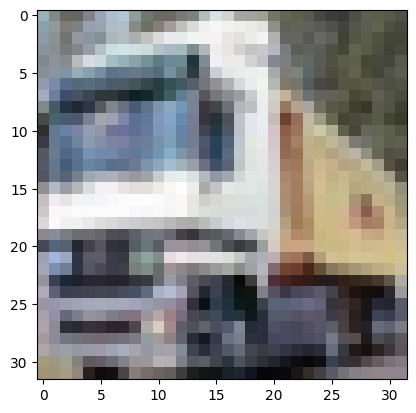

In [24]:
plt.imshow(train_images[1])

In [25]:
# สร้างโมเดล CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# คอมไพล์โมเดล
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# เทรนโมเดล
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 53ms/step - accuracy: 0.3539 - loss: 1.7449 - val_accuracy: 0.5608 - val_loss: 1.2198
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 53ms/step - accuracy: 0.5829 - loss: 1.1802 - val_accuracy: 0.6289 - val_loss: 1.0630
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 51ms/step - accuracy: 0.6546 - loss: 0.9864 - val_accuracy: 0.6668 - val_loss: 0.9529
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 54ms/step - accuracy: 0.6944 - loss: 0.8660 - val_accuracy: 0.6628 - val_loss: 0.9886
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 51ms/step - accuracy: 0.7266 - loss: 0.7773 - val_accuracy: 0.6958 - val_loss: 0.9065
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.7480 - loss: 0.7084 - val_accuracy: 0.7142 - val_loss: 0.8431
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.7769 - loss: 0.6435 - val_accuracy: 0.7112 - val_loss: 0.8521
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.792

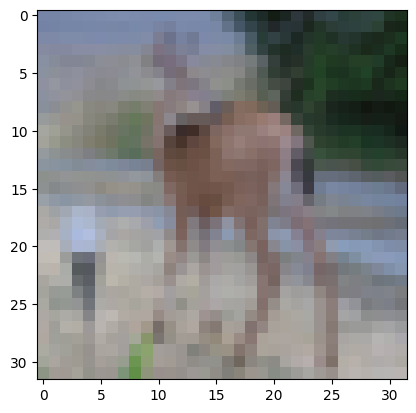

In [36]:
plt.imshow(test_images[100])

In [29]:
# ประเมินผลลัพธ์บน test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.2%}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7209 - loss: 0.8833
Test Loss: 0.8944
Test Accuracy: 72.09%


In [30]:

# แสดงโครงสร้างของโมเดล
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 480,608 (1.83 MB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,406 (1.22 MB)

In [31]:
yp = model.predict(test_images)
yp[120]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


array([3.2184246e-01, 1.9885839e-03, 1.3135347e-04, 1.6256489e-04,
       1.1972011e-06, 3.1392974e-05, 1.9800698e-05, 1.7652521e-07,
       6.7162734e-01, 4.1951234e-03], dtype=float32)

In [38]:
np.argmax(yp[0])


3

In [33]:
model.save('CNN_fashion_mnist.keras')